In [75]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [76]:
#Load Dataset
data = sm.datasets.get_rdataset("AirPassengers").data

In [77]:
data.columns = ["Month", "Passenger"]

data["Month"] = pd.to_datetime(data["Month"])

data.set_index("Month", inplace = True)

print(data.head())

                               Passenger
Month                                   
1970-01-01 00:00:00.000001949        112
1970-01-01 00:00:00.000001949        118
1970-01-01 00:00:00.000001949        132
1970-01-01 00:00:00.000001949        129
1970-01-01 00:00:00.000001949        121


In [78]:
print(data.tail())

                               Passenger
Month                                   
1970-01-01 00:00:00.000001960        606
1970-01-01 00:00:00.000001960        508
1970-01-01 00:00:00.000001960        461
1970-01-01 00:00:00.000001960        390
1970-01-01 00:00:00.000001960        432


In [79]:
data.describe()

,Passenger
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1970-01-01 00:00:00.000001949 to 1970-01-01 00:00:00.000001960
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Passenger  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


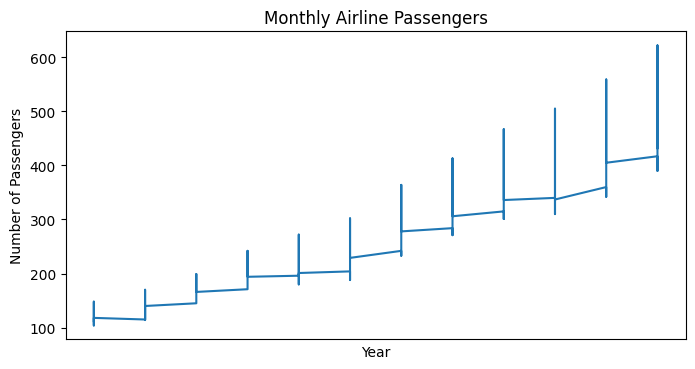

In [81]:
plt.figure(figsize=(8,4))
plt.plot(data)
plt.title("Monthly Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()


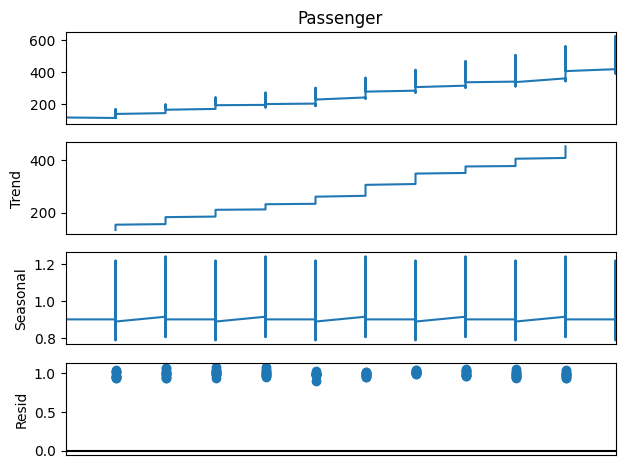

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(data["Passenger"], model = "multiplicative", period = 24)
decompose.plot()
plt.show()

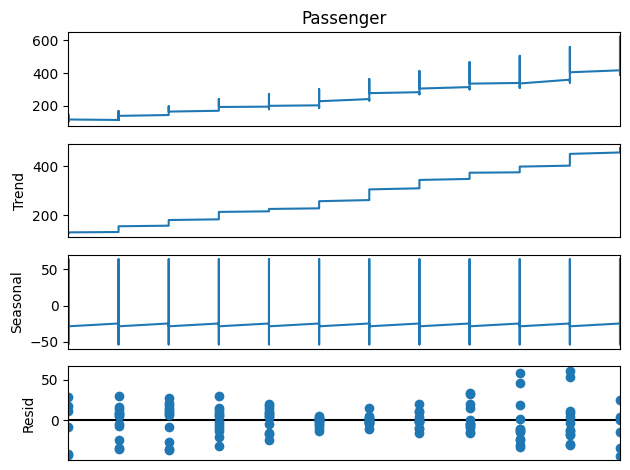

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(data["Passenger"], model = "addictive", period = 12)
decompose.plot()
plt.show()

In [84]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)

print("ADF Statistics:", result[0])
print("p-value:", result[1])

ADF Statistics: 0.8153688792060482
p-value: 0.991880243437641


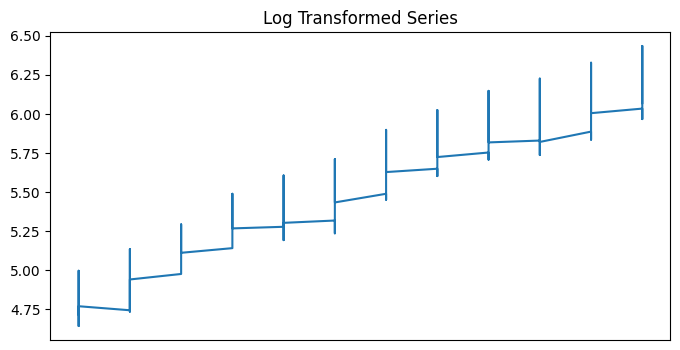

In [85]:
import numpy as np

data_log = np.log(data["Passenger"])

plt.figure(figsize=(8,4))
plt.plot(data_log)
plt.title("Log Transformed Series")
plt.show()

In [87]:


result = adfuller(data_log)

print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -1.7170170891069607
p-value: 0.42236677477039125


<Figure size 800x400 with 0 Axes>

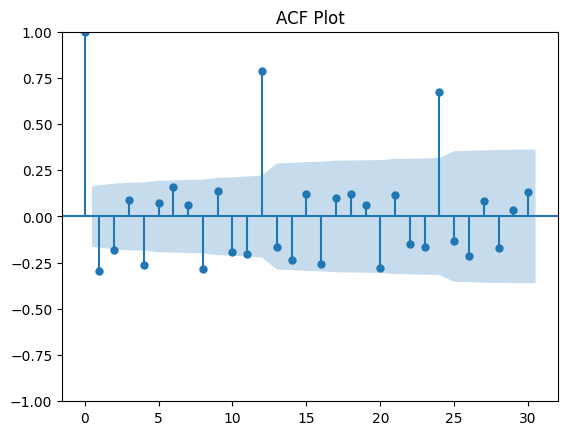

In [94]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plot_acf(data_log_diff, lags=30)
plt.title("ACF Plot")
plt.show()


<Figure size 800x400 with 0 Axes>

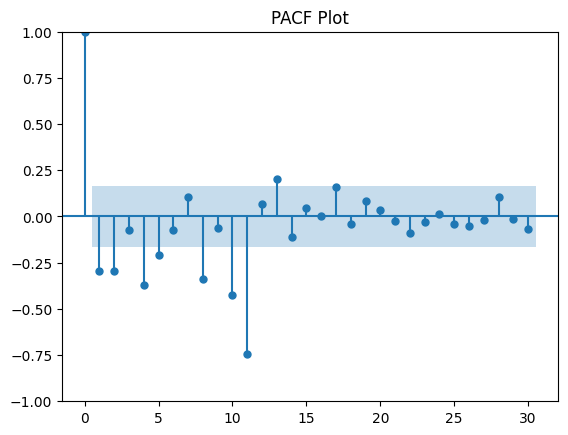

In [92]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(8,4))
plot_pacf(data_log_diff, lags=30, method='ywm')
plt.title("PACF Plot")
plt.show()


In [95]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data["Passenger"], order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())

C:\Users\91934\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91934\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91934\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Passenger   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Wed, 11 Feb 2026   AIC                           1394.683
Time:                        21:10:12   BIC                           1403.571
Sample:                             0   HQIC                          1398.294
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

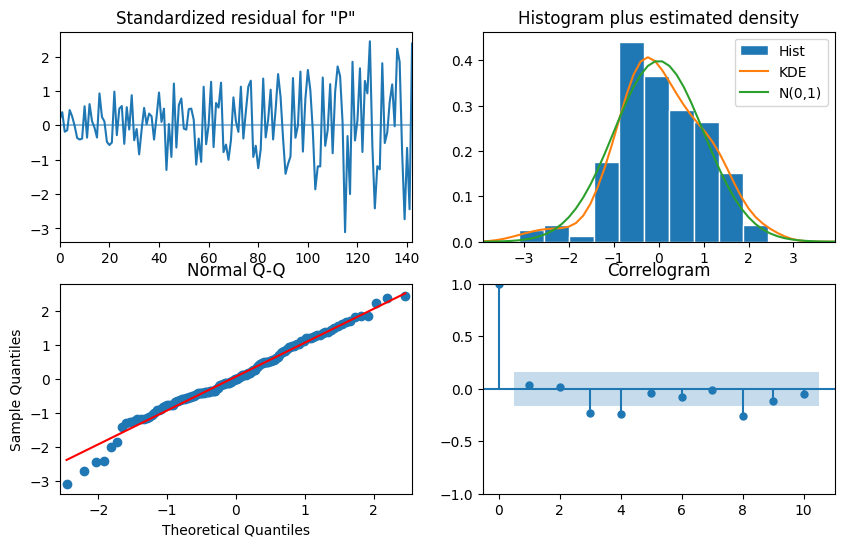

In [96]:
model_fit.plot_diagnostics(figsize=(10,6))
plt.show()


C:\Users\91934\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


144    475.735059
145    454.996073
146    464.830415
147    460.167010
148    462.378378
149    461.329756
150    461.827008
151    461.591213
152    461.703026
153    461.650005
154    461.675148
155    461.663225
Name: predicted_mean, dtype: float64


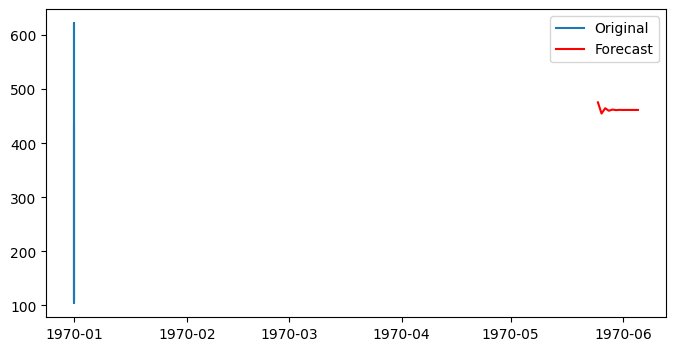

In [99]:
forecast = model_fit.forecast(steps=12)

print(forecast)

plt.figure(figsize=(8,4))
plt.plot(data["Passenger"], label="Original")
plt.plot(forecast, label="Forecast", color='red')
plt.legend()
plt.show()
